# Markov chain Monte Carlo

In the [previous tutorial](./max_likelihood.html), you we introduced to the idea of the **likelihood**, $L$. 
This parameter is just one of the components of Bayes theorem, the foundation of Bayesian inference, 

$$ p = \frac{P L}{Z} $$, 

where, $p$ is the posterior probability, $P$ is the prior probability, and $Z$ is the evidence (more about these latter two factors in the [custom priors](./custom_priors.html) and [nested sampling](nested_sampling.html) tutorials). 
This tutorial will show how Markov chain Monte Carlo may be used to evaluate the shape of the posterior probability, and show what this means for our understanding of a models inverse uncertainties. 

Let's start where we left of the previous tutorial, with a set of variables that maximise the likelihood of some model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 10, 20)
y = np.exp(0.5 * x) * 4
y += y * np.random.randn(20) * 0.1
dy = y * 0.2

In [3]:
def my_model(x, a, b):
    """
    A function to describe the model under investgation.
    
    Args:
        x (array_like): Abscissa data.
        a (float): The pre-exponential factor.
        b (float): The x-multiplicative factor.
    
    Returns
        y (array_like): Ordinate data.
    """
    return a * np.exp(b * x)

In [4]:
from uravu.relationship import Relationship

In [5]:
modeller = Relationship(my_model, x, y, dy)
modeller.max_likelihood()

In [6]:
from uravu import plotting

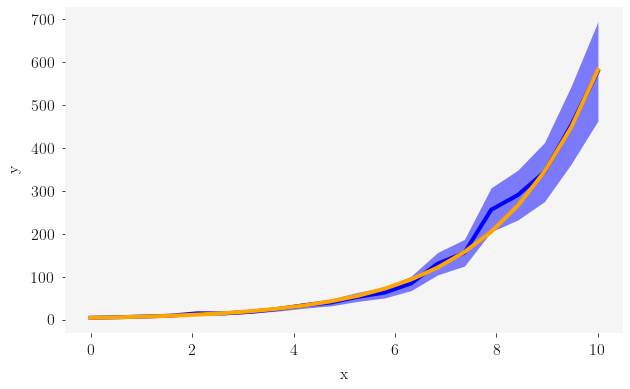

In [7]:
ax = plotting.plot_relationship(modeller)
plt.show()

The maximum likelihood values for the variables, `a` and `b`, in `my_model()` are,

In [8]:
print(modeller.variables)

[4.04704286 0.49693634]


It is clear from the plot above that there is some uncertainty in the experimental data (shown be the blue shaded region). 
However, there is no uncertainty in the variables currently, because these are the single values which **maximize** the likelihood. 

This is where the posterior distributions are useful. 
If we know the structure of these distributions, we can attribute confidence intervals (and when the distributions are Gaussian standard deviations) to these variables. 

MCMC is a tool that we can use to *sample* the posterior distribution. 
In `uravu` performing an MCMC sampling for some relationship is as simple as, 

In [9]:
modeller.mcmc()

100%|██████████| 1000/1000 [01:21<00:00, 12.22it/s]


Having performed the MCMC sampling, lets visualise the results.

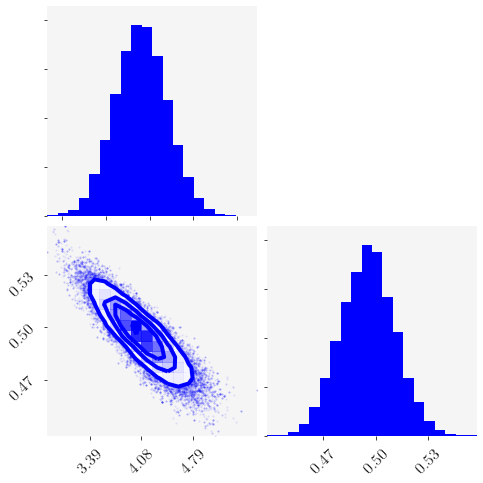

In [11]:
plotting.plot_corner(modeller)
plt.show()

Above is a [corner](https://corner.readthedocs.io/) plot, showing the posterior distribution for each variables and a correlation plot showing the correlation between them. 

Each variable is stored in a list in the `variables` object. 

In [12]:
print(modeller.variables[0])

Distribution: Distribution
Size: 50000
Samples: [4.40e+00 4.42e+00 ... 3.64e+00 4.00e+00]
Median: 4.08e+00
Symetrical Error: 3.58e-01
Confidence intervals: [3.39e+00 4.79e+00]
Confidence interval points: [2.5 97.5]
Reporting Value: 4.1+/-0.4
Unit: dimensionless
Normal: True



These objects are of type `uravu.distribution.Distribution`, a special class for storing information about a distribution. 

Above we can see that variable `a`, is normally distributed (Gaussian) and can be reported as $4.1\pm0.4$. 

The `uravu` plotting will take advantage of these `Distribution` class objects.
When the relationship is plotted, a subset of the models that are probable for the given data will be plotted, giving a *probability distribution* of lines on the plot on top of the data. 

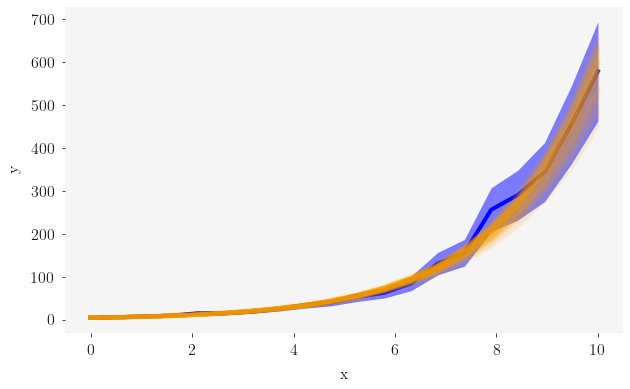

In [14]:
plotting.plot_relationship(modeller)
plt.show()

The orange line is now spread across most of the blue shaded area, indication the range of probable models that are available given the data. 